In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('ggplot')

# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('notebook')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd

In [4]:
df=pd.read_excel('./new_ raw _data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1666 non-null   int64  
 1   photo                     1666 non-null   object 
 2   name                      1666 non-null   object 
 3   blurb                     1666 non-null   object 
 4   goal                      1666 non-null   int64  
 5   pledged                   1666 non-null   float64
 6   state                     1666 non-null   object 
 7   slug                      1666 non-null   object 
 8   disable_communication     1666 non-null   bool   
 9   country                   1666 non-null   object 
 10  country_displayable_name  1666 non-null   object 
 11  currency                  1666 non-null   object 
 12  currency_symbol           1666 non-null   object 
 13  currency_trailing_code    1666 non-null   bool   
 14  deadline

In [181]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split会报错，
#原因在于这个cross_validatio这个包早就不在使用了，划分到了model_selection这个包中。

# 1.加载数据
X = data.drop(columns=['location','category','success','goal'])
Y = data['success']

# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# 设置随机数种子，以便比较结果。

# 删减

In [5]:
df=df.drop(columns=['photo','urls'])

In [6]:
df=df.drop(columns=[
    'is_liked',
    'is_disliked',
    'usd_type',
    'current_currency',
    'currency_symbol',
    'disable_communication',
    'pledged',
    'usd_exchange_rate',
    'converted_pledged_amount',
    'usd_pledged',
    'backers_count',
])
# df

In [7]:
df=df.drop(columns=[
    'is_starrable',
    'currency',
    'currency_trailing_code',
])
# df

In [61]:
df=df.drop(columns=[
    'creator',
#     'location',
    'profile',
    'static_usd_rate',
    'fx_rate'
])
df

,id,name,blurb,goal,state,slug,country,country_displayable_name,deadline,state_changed_at,created_at,launched_at,staff_pick,location,category,spotlight,percent_funded
0,1112997123,Vie Zone - The neuro earphones that help you f...,Elegantly designed earphones that scan your br...,10000,live,vie-zone-the-cyber-earphones-that-help-you-foc...,US,美國,1635087547,1631631551,1574553477,1631631547,True,"{'id': 28414717, 'name': 'Kamakura', 'slug': '...","{'id': 16, 'name': '科技', 'analytics_name': 'Te...",False,936.840000
1,91283229,iMicro Q2p: An 800x Polarizing Fingertip Micro...,"Tiny, light, optical performance comparable to...",12500,live,imicro-q2p-an-800x-polarizing-fingertip-micros...,CA,加拿大,1639839600,1634652003,1630316117,1634652000,False,"{'id': 2151849, 'name': 'Shanghai', 'slug': 's...","{'id': 16, 'name': '科技', 'analytics_name': 'Te...",False,594.194320
2,790178999,"Mini Pupper: Open-Source,ROS Robot Dog Kit",Mini Pupper will make robotics easier for scho...,77853,live,mini-pupper-open-sourceros-robot-dog-kit,HK,中國香港,1635512409,1632920412,1631796548,1632920409,True,"{'id': 2165352, 'name': 'Hong Kong', 'slug': '...","{'id': 338, 'name': '機器人', 'analytics_name': '...",False,4240.630419
3,564032676,SONOFF NSPanel Smart Scene Wall Switch,Seamlessly control your home appliances—from l...,38922,live,sonoff-nspanel-smart-scene-wall-switch,HK,中國香港,1636552803,1633957205,1631067266,1633957203,False,"{'id': 2165352, 'name': 'Hong Kong', 'slug': '...","{'id': 334, 'name': '電子類 DIY', 'analytics_name...",False,4562.943836
4,656417709,Carvera - A Fully Automatic Desktop CNC for Ma...,"Equipped with smart features as ATC, Auto Prob...",100000,live,carvera,US,美國,1635260397,1632236401,1630897168,1632236397,True,"{'id': 2151330, 'name': 'Beijing', 'slug': 'be...","{'id': 335, 'name': '製造工具', 'analytics_name': ...",False,1462.745450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,1429085353,A complete Dietitians CRM - www.dietbmr.com (C...,Dietitians can easily manage their business. T...,100000,canceled,a-complete-dietitians-crm-wwwdietbmrcom,GB,英國,1435253978,1432729127,1431154668,1431365978,False,"{'id': 2295402, 'name': 'Ahmadabad', 'slug': '...","{'id': 51, 'name': '軟體', 'analytics_name': 'So...",False,0.000000
1411,1469701566,Remote sensing mapper for noble metal containi...,For noble metal hunters: Remote sensing softwa...,11000000,canceled,remote-sensing-mapper-for-noble-metal-containi...,JP,日本,1508724866,1506738806,1505720837,1506132866,False,"{'id': 15015370, 'name': 'Osaka-shi', 'slug': ...","{'id': 51, 'name': '軟體', 'analytics_name': 'So...",False,0.000909
1412,1630819153,Vie Zone - The Cyber Earphones that make you H...,Elegantly designed earphones that can pick up ...,10000,canceled,viezone-the-cyber-earphones-that-make-you-hype...,US,美國,1628168403,1627558051,1622765438,1625576403,False,"{'id': 28414717, 'name': 'Kamakura', 'slug': '...","{'id': 341, 'name': '穿戴式裝置', 'analytics_name':...",False,1182.020000
1413,2131528585,Snore Circle Smart Anti-Snoring Throat Muscle ...,This is our 5th generation Snore Circle and ou...,150000,canceled,snore-circle-smart-anti-snoring-throat-muscle-...,HK,中國香港,1547218832,1545284955,1540883938,1544626832,False,"{'id': 2161853, 'name': 'Shenzhen', 'slug': 's...","{'id': 16, 'name': '科技', 'analytics_name': 'Te...",False,248.223333


In [8]:
df=df.drop(columns=[
    'state_changed_at',
    'created_at',
])
df

,id,name,blurb,goal,state,slug,country,country_displayable_name,deadline,launched_at,staff_pick,static_usd_rate,fx_rate,creator,location,category,profile,spotlight,percent_funded
0,1112997123,Vie Zone - The neuro earphones that help you f...,Elegantly designed earphones that scan your br...,10000,live,vie-zone-the-cyber-earphones-that-help-you-foc...,US,the United States,1635087547,1631631547,True,1.000000,1.000000,"{'id': 1025337448, 'name': 'Vie Style Inc.', '...","{'id': 28414717, 'name': 'Kamakura', 'slug': '...","{'id': 16, 'name': 'Technology', 'analytics_na...","{'id': 3859172, 'project_id': 3859172, 'state'...",False,966.850000
1,91283229,iMicro Q2p: An 800x Polarizing Fingertip Micro...,"Tiny, light, optical performance comparable to...",12500,live,imicro-q2p-an-800x-polarizing-fingertip-micros...,CA,Canada,1639839600,1634652000,False,0.806969,0.813058,"{'id': 1289187249, 'name': 'QingYing E&amp;T L...","{'id': 2151849, 'name': 'Shanghai', 'slug': 's...","{'id': 16, 'name': 'Technology', 'analytics_na...","{'id': 4272045, 'project_id': 4272045, 'state'...",False,725.346320
2,790178999,"Mini Pupper: Open-Source,ROS Robot Dog Kit",Mini Pupper will make robotics easier for scho...,77853,live,mini-pupper-open-sourceros-robot-dog-kit,HK,Hong Kong,1635512409,1632920409,True,0.128508,0.128633,"{'id': 336477435, 'name': 'MangDang', 'is_regi...","{'id': 2165352, 'name': 'Hong Kong', 'slug': '...","{'id': 338, 'name': 'Robots', 'analytics_name'...","{'id': 4280725, 'project_id': 4280725, 'state'...",False,4311.251975
3,1768605646,BEATDROP: Place-N-Play Induction Wireless Spea...,Enjoy an immediate amplification of audio &amp...,5000,live,beatdrop-place-and-play-inductive-wireless-cha...,US,the United States,1637330430,1634734830,False,1.000000,1.000000,"{'id': 1095384295, 'name': 'TOPWORK TEAM', 'is...","{'id': 2161853, 'name': 'Shenzhen', 'slug': 's...","{'id': 337, 'name': 'Gadgets', 'analytics_name...","{'id': 4287343, 'project_id': 4287343, 'state'...",False,158.580000
4,564032676,SONOFF NSPanel Smart Scene Wall Switch,Seamlessly control your home appliances—from l...,38922,live,sonoff-nspanel-smart-scene-wall-switch,HK,Hong Kong,1636552803,1633957203,False,0.128462,0.128633,"{'id': 352502085, 'name': 'SONOFF', 'slug': 's...","{'id': 2165352, 'name': 'Hong Kong', 'slug': '...","{'id': 334, 'name': 'DIY Electronics', 'analyt...","{'id': 4276505, 'project_id': 4276505, 'state'...",False,4702.761934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,1338465814,Train your own JARVIS (Canceled),A customized AI personal assistant which you c...,500000,canceled,train-your-own-jarvis,HK,Hong Kong,1507764850,1505172850,False,0.127989,0.128633,"{'id': 1625801046, 'name': 'Ka Fung CHONG', 'i...","{'id': 2165352, 'name': 'Hong Kong', 'slug': '...","{'id': 332, 'name': 'Apps', 'analytics_name': ...","{'id': 3137878, 'project_id': 3137878, 'state'...",False,0.040000
1662,1030973550,PAO-the first family entertainment treadmill i...,"With PAO, you can walk,run,jump and crouch in ...",50000,canceled,pao-the-first-family-entertainment-treadmill-i...,US,the United States,1432082575,1427762575,False,1.000000,1.000000,"{'id': 251670721, 'name': 'Terminal ONE', 'slu...","{'id': 2151330, 'name': 'Beijing', 'slug': 'be...","{'id': 52, 'name': 'Hardware', 'analytics_name...","{'id': 1801611, 'project_id': 1801611, 'state'...",False,8.864000
1663,223877975,Film 35- Innovative Photography Experience (Ca...,Film35 creates a new insight of traditional An...,850000,canceled,film-35-innovative-photography-experience,HK,Hong Kong,1541999907,1536812307,False,0.127407,0.128633,"{'id': 1374923168, 'name': 'The Realizes Co.',...","{'id': 2165352, 'name': 'Hong Kong', 'slug': '...","{'id': 333, 'name': 'Camera Equipment', 'analy...","{'id': 3421103, 'project_id': 3421103, 'state'...",False,24.199412
1664,1304711063,"KoolMex-longer battery life,lower temperature,...",KoolMex™ is a sticker capable of reducing phon...,10000,cance

In [6]:
df=df.drop(columns=[
    'is_liked',
    'is_disliked',
    'usd_type',
    'current_currency',
    'currency_symbol',
    'disable_communication',
    'pledged',
    'usd_exchange_rate',
    'converted_pledged_amount',
    'usd_pledged',
    'backers_count',
])
# df

# 时间戳

In [9]:
import datetime
t1 = datetime.datetime(2021,10,1)
today=datetime.datetime.now()
t1>=today

False

In [10]:
pd.to_datetime(df['deadline'],unit='s')#o_datetime 如果传入的是10位时间戳，unit设置为秒，可以转换为datetime

0      2021-10-24 14:59:07
1      2021-12-18 15:00:00
2      2021-10-29 13:00:09
3      2021-11-19 14:00:30
4      2021-11-10 14:00:03
               ...        
1661   2017-10-11 23:34:10
1662   2015-05-20 00:42:55
1663   2018-11-12 05:18:27
1664   2018-07-26 07:25:00
1665   2015-06-25 17:39:38
Name: deadline, Length: 1666, dtype: datetime64[ns]

In [11]:
df['deadline']=pd.to_datetime(df['deadline'],unit='s')
df=df[df['deadline']<=t1]

In [12]:
# df['state_changed_at']=pd.to_datetime(df['state_changed_at'],unit='s')
# df['created_at']=pd.to_datetime(df['created_at'],unit='s')
df['launched_at']=pd.to_datetime(df['launched_at'],unit='s')

In [13]:
df[['id','name','state','deadline']]

,id,name,state,deadline
34,988492654,"OBSBOT Me: AI-Powered, Auto-Tracking Phone Mount",successful,2021-06-02 12:45:12
35,136859681,"EBO, Your Smart &amp; Interactive Family Compa...",successful,2021-06-09 02:00:00
36,29690278,synapseWear: wearable sensing for the body &am...,successful,2017-09-20 14:09:51
37,953547944,BOCCO: The family robot that brings your loved...,successful,2015-04-12 11:26:05
38,1934214216,"CERAMBOT, The Most Affordable Ceramic 3D Printer",successful,2019-01-11 15:59:31
...,...,...,...,...
1661,1338465814,Train your own JARVIS (Canceled),canceled,2017-10-11 23:34:10
1662,1030973550,PAO-the first family entertainment treadmill i...,canceled,2015-05-20 00:42:55
1663,223877975,Film 35- Innovative Photography Experience (Ca...,canceled,2018-11-12 05:18:27
1664,1304711063,"KoolMex-longer battery life,lower temperature,...",canceled,2018-07-26 07:25:00


In [14]:
df['period']=df['deadline']-df['launched_at']
df['period']

34     35 days 00:00:00
35     33 days 13:57:33
36     45 days 00:00:00
37     30 days 00:00:00
38     45 days 00:00:00
             ...       
1661   30 days 00:00:00
1662   50 days 00:00:00
1663   60 days 01:00:00
1664   30 days 00:00:00
1665   45 days 00:00:00
Name: period, Length: 1612, dtype: timedelta64[ns]

# category

In [15]:
import json
# df['category'].map(json.loads)
json.loads(df['category'].iloc[0].replace("'",'"'))

{'id': 333,
 'name': 'Camera Equipment',
 'analytics_name': 'Camera Equipment',
 'slug': 'technology/camera equipment',
 'position': 3,
 'parent_id': 16,
 'parent_name': 'Technology',
 'color': 6526716,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/technology/camera%20equipment'}}}

In [16]:
df['category']=[i['name'] for i in df['category'].str.replace("'",'"').map(json.loads)]
df['category']

34      Camera Equipment
35            Technology
36             Wearables
37                Robots
38           3D Printing
              ...       
1661                Apps
1662            Hardware
1663    Camera Equipment
1664          Technology
1665            Software
Name: category, Length: 1612, dtype: object

# location

In [17]:
df['location'].iloc[0]
#.str.replace("'",'"').map(json.loads)

"{'id': 2165352, 'name': 'Hong Kong', 'slug': 'hong-kong-hk', 'short_name': 'Hong Kong, Hong Kong', 'displayable_name': 'Hong Kong, Hong Kong', 'localized_name': 'Hong Kong', 'country': 'HK', 'state': 'Hong Kong Island', 'type': 'Town', 'is_root': False, 'expanded_country': 'Hong Kong', 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/hong-kong-hk', 'location': 'https://www.kickstarter.com/locations/hong-kong-hk'}, 'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1634886483.1a3a1654788b56989fc5ee484284f9cc5fd7b512&amp;woe_id=2165352'}}}"

In [18]:
import re
[
    re.search("\'expanded_country\': \'.*?\'", i).group().split(': ')[1].strip("'")
    for i in df['location']
]  #.str.replace("'",'"')]#注意！冒号后有空格orz！！

['Hong Kong',
 'Hong Kong',
 'Japan',
 'Japan',
 'China',
 'China',
 'China',
 'Hong Kong',
 'Japan',
 'China',
 'China',
 'Hong Kong',
 'Israel',
 'Japan',
 'Japan',
 'Japan',
 'Hong Kong',
 'China',
 'South Korea',
 'Turkey',
 'China',
 'China',
 'Hong Kong',
 'China',
 'China',
 'Hong Kong',
 'Japan',
 'Hong Kong',
 'Philippines',
 'Japan',
 'Japan',
 'China',
 'Iraq',
 'Hong Kong',
 'Japan',
 'Israel',
 'Hong Kong',
 'China',
 'China',
 'China',
 'China',
 'Hong Kong',
 'Singapore',
 'China',
 'Hong Kong',
 'Hong Kong',
 'China',
 'Taiwan',
 'Japan',
 'Israel',
 'India',
 'Hong Kong',
 'China',
 'Hong Kong',
 'Hong Kong',
 'China',
 'South Korea',
 'Hong Kong',
 'China',
 'Taiwan',
 'China',
 'Hong Kong',
 'Israel',
 'Hong Kong',
 'China',
 'Israel',
 'Israel',
 'China',
 'Taiwan',
 'Hong Kong',
 'Japan',
 'China',
 'China',
 'China',
 'Hong Kong',
 'Singapore',
 'Hong Kong',
 'Japan',
 'South Korea',
 'Israel',
 'Israel',
 'Hong Kong',
 'China',
 'Japan',
 'Singapore',
 'China',
 

In [19]:
df['location']=[
    re.search("\'expanded_country\': \'.*?\'", i).group().split(': ')[1].strip("'")
    for i in df['location']
]  
df['location']

34      Hong Kong
35      Hong Kong
36          Japan
37          Japan
38          China
          ...    
1661    Hong Kong
1662        China
1663    Hong Kong
1664    Singapore
1665        India
Name: location, Length: 1612, dtype: object

In [79]:
# df.to_excel('合并curtailed.xlsx',index=False)
[json.loads(i,strict=False) for i in df['location'].str.replace("'",'"')]

JSONDecodeError: Expecting value: line 1 column 248 (char 247)

In [21]:
df.to_excel('new_data.xlsx',index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 34 to 1665
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   id                        1612 non-null   int64          
 1   name                      1612 non-null   object         
 2   blurb                     1612 non-null   object         
 3   goal                      1612 non-null   int64          
 4   state                     1612 non-null   object         
 5   slug                      1612 non-null   object         
 6   country                   1612 non-null   object         
 7   country_displayable_name  1612 non-null   object         
 8   deadline                  1612 non-null   datetime64[ns] 
 9   launched_at               1612 non-null   datetime64[ns] 
 10  staff_pick                1612 non-null   bool           
 11  static_usd_rate           1612 non-null   float64        
 12  fx_ra

# 手工处理

- 构建变量success
- 对于分类变量location
    - 由于35个地区数量分布不均衡
    - 所以剔除数量在十个及以下的地区
    - 最终保留了12个样本数量大于10的地区

# 虚拟变量

In [2]:
data=pd.read_excel('./数据集（updated）/12location.xlsx')[['goal','staff_pick','location','category','period','success']]
data

,goal,staff_pick,location,category,period,success
0,388659,True,Hong Kong,Camera Equipment,35,1
1,77600,True,Hong Kong,Technology,34,1
2,17500,True,Japan,Wearables,45,1
3,20000,True,Japan,Robots,30,1
4,10000,True,China,3D Printing,45,1
...,...,...,...,...,...,...
1535,500000,False,Hong Kong,Apps,30,0
1536,50000,False,China,Hardware,50,0
1537,850000,False,Hong Kong,Camera Equipment,60,0
1538,10000,False,Singapore,Technology,30,0


In [3]:
location_dict=dict([(data['location'].unique()[i],i) for i in range(len(data['location'].unique()))])
location_dict

{'Hong Kong': 0,
 'Japan': 1,
 'China': 2,
 'Israel': 3,
 'South Korea': 4,
 'Turkey': 5,
 'Singapore': 6,
 'Taiwan': 7,
 'India': 8,
 'Russia': 9,
 'Thailand': 10,
 'Viet Nam': 11}

In [4]:
category_dict=dict([(data['category'].unique()[i],i) for i in range(len(data['category'].unique()))])
category_dict

{'Camera Equipment': 0,
 'Technology': 1,
 'Wearables': 2,
 'Robots': 3,
 '3D Printing': 4,
 'Software': 5,
 'Gadgets': 6,
 'Hardware': 7,
 'DIY Electronics': 8,
 'Sound': 9,
 'Fabrication Tools': 10,
 'Flight': 11,
 'Apps': 12,
 'Makerspaces': 13,
 'Space Exploration': 14,
 'Web': 15}

In [5]:
for i in range(0,len(location_dict)-1):
    data['loc{}'.format(i)]=data['location'].map(location_dict).map(lambda x:1 if x==i else 0)

In [6]:
data

,goal,staff_pick,location,category,period,success,loc0,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,loc10
0,388659,True,Hong Kong,Camera Equipment,35,1,1,0,0,0,0,0,0,0,0,0,0
1,77600,True,Hong Kong,Technology,34,1,1,0,0,0,0,0,0,0,0,0,0
2,17500,True,Japan,Wearables,45,1,0,1,0,0,0,0,0,0,0,0,0
3,20000,True,Japan,Robots,30,1,0,1,0,0,0,0,0,0,0,0,0
4,10000,True,China,3D Printing,45,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,500000,False,Hong Kong,Apps,30,0,1,0,0,0,0,0,0,0,0,0,0
1536,50000,False,China,Hardware,50,0,0,0,1,0,0,0,0,0,0,0,0
1537,850000,False,Hong Kong,Camera Equipment,60,0,1,0,0,0,0,0,0,0,0,0,0
1538,10000,False,Singapore,Technology,30,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
for i in range(len(category_dict)-1):
    data['cate{}'.format(i)]=data['category'].map(category_dict).map(lambda x:1 if x==i else 0)
data

,goal,staff_pick,location,category,period,success,loc0,loc1,loc2,loc3,...,cate5,cate6,cate7,cate8,cate9,cate10,cate11,cate12,cate13,cate14
0,388659,True,Hong Kong,Camera Equipment,35,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,77600,True,Hong Kong,Technology,34,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17500,True,Japan,Wearables,45,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20000,True,Japan,Robots,30,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10000,True,China,3D Printing,45,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,500000,False,Hong Kong,Apps,30,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1536,50000,False,China,Hardware,50,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1537,850000,False,Hong Kong,Camera Equipment,60,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1538,10000,False,Singapore,Technology,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data.to_excel('data(new).xlsx',index=False)

# goal的标准化与取对数
——尝试做标准化，但实际建模中没有用到，所以此part不用讲

## 标准化

In [49]:
from scipy.stats import zscore

In [47]:
data.goal.describe()

count    1.540000e+03
mean     3.606631e+05
std      2.249116e+06
min      1.000000e+00
25%      1.000000e+04
50%      4.000000e+04
75%      1.000000e+05
max      5.000000e+07
Name: goal, dtype: float64

In [50]:
zscore(data.goal).mean(),zscore(data.goal).std()

(-4.613913868572079e-18, 1.0)

In [51]:
zscore(data.goal).max(),zscore(data.goal).min(),np.median(zscore(data.goal))

(22.077767189496484, -0.16040933362449772, -0.14261923681372946)

(array([1.528e+03, 4.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.16040933,  2.06340832,  4.28722597,  6.51104362,  8.73486128,
        10.95867893, 13.18249658, 15.40631423, 17.63013188, 19.85394954,
        22.07776719]),
 <BarContainer object of 10 artists>)

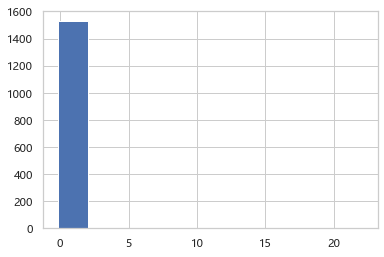

In [52]:
plt.hist(zscore(data.goal))

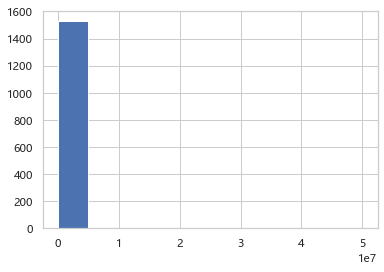

In [53]:
plt.hist(data.goal)
plt.show()

## 取对数

(array([  1.,   1.,   5.,  38., 178., 565., 517., 169.,  56.,  10.]),
 array([ 0.        ,  1.77275336,  3.54550671,  5.31826007,  7.09101343,
         8.86376678, 10.63652014, 12.40927349, 14.18202685, 15.95478021,
        17.72753356]),
 <BarContainer object of 10 artists>)

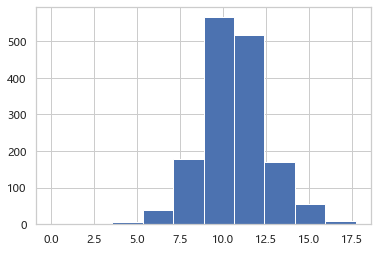

In [54]:
plt.hist(np.log(data.goal))

In [55]:
data['log_goal']=np.log(data.goal)
data

,goal,staff_pick,location,category,period,success,loc0,loc1,loc2,loc3,...,cate6,cate7,cate8,cate9,cate10,cate11,cate12,cate13,cate14,log_goal
0,388659,True,Hong Kong,Camera Equipment,35,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,12.870458
1,77600,True,Hong Kong,Technology,34,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,11.259323
2,17500,True,Japan,Wearables,45,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9.769956
3,20000,True,Japan,Robots,30,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9.903488
4,10000,True,China,3D Printing,45,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9.210340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,500000,False,Hong Kong,Apps,30,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,13.122363
1536,50000,False,China,Hardware,50,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,10.819778
1537,850000,False,Hong Kong,Camera Equipment,60,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,13.652992
1538,10000,False,Singapore,Technology,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.210340


# success与fail的描述性特征对比

In [56]:
d_succ=data[data.success==1]
d_fail=data[data.success==0]

In [57]:
d_succ.describe()

,goal,period,success,loc0,loc1,loc2,loc3,loc4,loc5,loc6,...,cate6,cate7,cate8,cate9,cate10,cate11,cate12,cate13,cate14,log_goal
count,8.170000e+02,817.000000,817.0,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,...,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,1.446007e+05,37.025704,1.0,0.465116,0.097919,0.212974,0.022032,0.062424,0.006120,0.070991,...,0.309670,0.135863,0.046512,0.070991,0.007344,0.002448,0.023256,0.003672,0.001224,10.242794
std,6.882396e+05,10.587431,0.0,0.499087,0.297387,0.409660,0.146877,0.242071,0.078038,0.256968,...,0.462641,0.342853,0.210719,0.256968,0.085434,0.049447,0.150807,0.060522,0.034986,1.698577
min,1.000000e+00,10.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000e+04,30.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.210340
50%,3.000000e+04,31.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.308953
75%,7.778000e+04,45.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.261640
max,1.500000e+07,89.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.523561


In [58]:
d_fail.describe()

,goal,period,success,loc0,loc1,loc2,loc3,loc4,loc5,loc6,...,cate6,cate7,cate8,cate9,cate10,cate11,cate12,cate13,cate14,log_goal
count,7.230000e+02,723.000000,723.0,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,...,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,6.048165e+05,38.308437,0.0,0.329184,0.132780,0.121715,0.020747,0.041494,0.019364,0.199170,...,0.189488,0.134163,0.047026,0.029046,0.004149,0.004149,0.157676,0.004149,0.002766,11.055323
std,3.183517e+06,13.072365,0.0,0.470242,0.339572,0.327183,0.142634,0.199567,0.137895,0.399653,...,0.392167,0.341064,0.211842,0.168051,0.064326,0.064326,0.364690,0.064326,0.052559,1.973126
min,1.000000e+02,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.605170
25%,2.000000e+04,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.903488
50%,5.000000e+04,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.819778
75%,2.000000e+05,45.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.206073
max,5.000000e+07,90.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.727534


# XGBoost

## goal

###  变量全塞进去

In [8]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split会报错，
#原因在于这个cross_validatio这个包早就不在使用了，划分到了model_selection这个包中。

# 1.加载数据
X = data.drop(columns=['location','category','success'])
Y = data['success']

# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# 设置随机数种子，以便比较结果。

In [9]:
from xgboost.sklearn import XGBClassifier
clf1 = XGBClassifier(n_jobs=-1)
clf1.fit(X_train,Y_train)

[16:07:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
X_train.shape

(1078, 29)

In [11]:
clf1.score(X_train,Y_train)#训练集准确率

0.9230055658627088

In [12]:
clf1.score(X_test,Y_test)#测试集准确率

0.7142857142857143

In [13]:
from sklearn.metrics import accuracy_score   #正确率
from sklearn.metrics import precision_score    #精准率
from sklearn.metrics import recall_score      #召回率
from sklearn.metrics import f1_score         #调和平均值F1

y_hat=clf1.predict(X_test)
#默认1类别为正例，可通过pos_label参数指定
print('正确率',accuracy_score(Y_test,y_hat))#样本不均衡时有局限性：都判断为数量多的那一类，结果正确率也很高
#违约为正样本
print('精准率',precision_score(Y_test,y_hat))
print('召回率',recall_score(Y_test,y_hat))
print('调和平均值F1',f1_score(Y_test,y_hat))

正确率 0.7142857142857143
精准率 0.7309236947791165
召回率 0.7368421052631579
调和平均值F1 0.7338709677419355


<Figure size 1920x720 with 0 Axes>

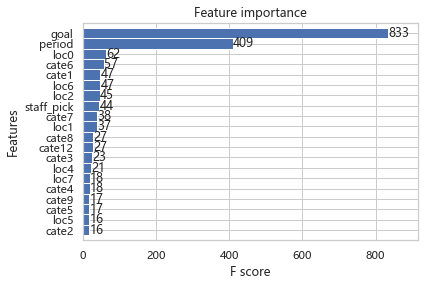

In [14]:
from xgboost import plot_importance
plt.figure(figsize=(16,6),dpi=120)
# 显示重要特征
# plt.figure()
plot_importance(clf1,max_num_features=20,height=1)
plt.show()

### 剔除重要性微小的变量

In [15]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split会报错，
#原因在于这个cross_validatio这个包早就不在使用了，划分到了model_selection这个包中。

# 1.加载数据
X = data.drop(columns=['location','category','success','goal','cate11','cate13','cate14'])
Y = data['success']

# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# 设置随机数种子，以便比较结果。

In [16]:
from xgboost.sklearn import XGBClassifier
clf3 = XGBClassifier(n_jobs=-1)
clf3.fit(X_train,Y_train)

[16:09:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
clf3.score(X_train,Y_train)#训练集准确率

0.8042671614100185

In [17]:
clf3.score(X_test,Y_test)#测试集准确率

0.6818181818181818

In [19]:
from sklearn.metrics import accuracy_score   #正确率
from sklearn.metrics import precision_score    #精准率
from sklearn.metrics import recall_score      #召回率
from sklearn.metrics import f1_score         #调和平均值F1

y_hat=clf3.predict(X_test)
#默认1类别为正例，可通过pos_label参数指定
print('正确率',accuracy_score(Y_test,y_hat))#样本不均衡时有局限性：都判断为数量多的那一类，结果正确率也很高
#违约为正样本
print('精准率',precision_score(Y_test,y_hat))
print('召回率',recall_score(Y_test,y_hat))
print('调和平均值F1',f1_score(Y_test,y_hat))

正确率 0.6818181818181818
精准率 0.6824817518248175
召回率 0.757085020242915
调和平均值F1 0.7178502879078695


## log_goal

对比后的结论
- goal是否取对数对于XGBoost的预测精度没有影响

In [59]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split会报错，
#原因在于这个cross_validatio这个包早就不在使用了，划分到了model_selection这个包中。

# 1.加载数据
X = data.drop(columns=['location','category','success','goal'])
Y = data['success']

# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)# 设置随机数种子，以便比较结果。

In [60]:
from xgboost.sklearn import XGBClassifier
clf2 = XGBClassifier(n_jobs=-1)
clf2.fit(X_train,Y_train)

[21:03:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [61]:
clf2.score(X_train,Y_train), clf2.score(X_test,Y_test)#训练集准确率,测试集准确率

(0.9230055658627088, 0.7142857142857143)

<Figure size 1920x720 with 0 Axes>

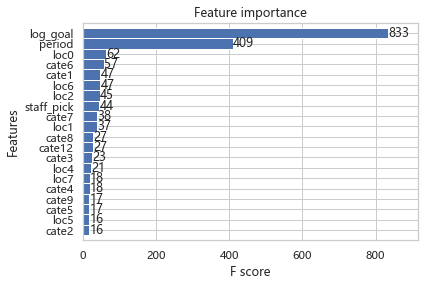

In [62]:
from xgboost import plot_importance
plt.figure(figsize=(16,6),dpi=120)
# 显示重要特征
# plt.figure()
plot_importance(clf2,max_num_features=20,height=1)
plt.show()

In [63]:
from sklearn.metrics import accuracy_score   #正确率
from sklearn.metrics import precision_score    #精准率
from sklearn.metrics import recall_score      #召回率
from sklearn.metrics import f1_score         #调和平均值F1

y_hat=clf2.predict(X_test)

#默认1类别为正例，可通过pos_label参数指定
print('正确率',accuracy_score(Y_test,y_hat))#样本不均衡时有局限性：都判断为数量多的那一类，结果正确率也很高
#违约为正样本
print('精准率',precision_score(Y_test,y_hat))
print('召回率',recall_score(Y_test,y_hat))
print('调和平均值F1',f1_score(Y_test,y_hat))

正确率 0.7142857142857143
精准率 0.7309236947791165
召回率 0.7368421052631579
调和平均值F1 0.7338709677419355


# logistics

In [64]:
import statsmodels.api as sm

In [66]:
logit = sm.Logit(X_train.astype(float),Y_train)#ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# 拟合模型
result = logit.fit()

ValueError: endog must be in the unit interval.